# Anyonic models

We solve the almost-bosonic anyon model of https://arxiv.org/pdf/1901.10739.pdf

Iter     Function value   Gradient norm 
     0     8.330703e+01     1.687566e+01
 * time: 0.003802061080932617
     1     6.244511e+01     1.076678e+01
 * time: 0.011259078979492188
     2     5.571089e+01     1.299742e+01
 * time: 0.028701066970825195
     3     3.976854e+01     8.769845e+00
 * time: 0.050660133361816406
     4     2.849233e+01     6.637381e+00
 * time: 0.07218718528747559
     5     2.007978e+01     5.004161e+00
 * time: 0.09063220024108887
     6     1.473300e+01     4.134152e+00
 * time: 0.16930603981018066
     7     1.201419e+01     3.496608e+00
 * time: 0.18308711051940918
     8     1.083731e+01     2.673260e+00
 * time: 0.1995680332183838
     9     1.057057e+01     4.373350e+00
 * time: 0.21221709251403809
    10     9.621250e+00     3.693421e+00
 * time: 0.22789406776428223
    11     9.182632e+00     2.688734e+00
 * time: 0.2403571605682373
    12     8.834038e+00     2.851401e+00
 * time: 0.2527740001678467
    13     8.486025e+00     2.545641e+00
 * time

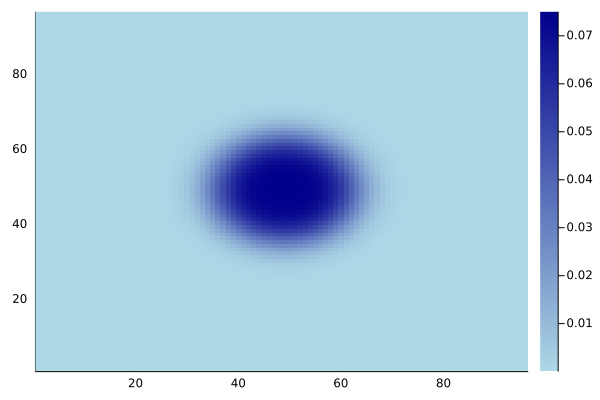

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 14
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)

# Parameters
Ecut = 50
n_electrons = 1
β = 5

terms = [Kinetic(2),
         ExternalFromReal(X -> pot(X...)),
         Anyonic(1, β)
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-14)  # Reduce tol for production
E = scfres.energies.total
s = 2
E11 = π/2 * (2(s+1)/s)^((s+2)/s) * (s/(s+2))^(2(s+1)/s) * E^((s+2)/s) / β
println("e(1,1) / (2π)= ", E11 / (2π))
display(heatmap(scfres.ρ[:, :, 1, 1], c=:blues))